In [1]:
import csv
import numpy as np
import pandas as pd

In order to be able to add other fuzzifiers/experiments in the future, we retrieve the name of all used fuzzifiers through the names of log files.

In [2]:
import glob

leading_part = 'data/axioms-results-holdout-'
trailing_part = '-details.csv'

fuzzifiers = set()

for file_name in glob.glob('data/*details.csv'):
    experiment = file_name[len(leading_part):-len(trailing_part)]
    sep_position = experiment.find('-')
    fuzzifier = experiment[:sep_position]
    fuzzifiers.add(fuzzifier)

print fuzzifiers

set(['QuantileConstPiecewise', 'Exponential(0.5)', 'Crisp', 'Linear', 'Exponential(0.4)', 'Exponential(0.07)', 'Exponential(0.001)', 'Exponential(0.3)', 'Exponential(0.2)', 'QuantileLinPiecewise', 'Exponential(0.1)', 'Exponential(0.005)'])


Now we want to obtain, for a given fuzzifier, all the testing errors for the inferred possibilities of pairs of axioms. Note that for each fuzzifier we performed 10 experiments, shuffling each time the axiom pairs in order to select different pairs for training, model selection, and validation. Thus at each experiment the pairs used for testing are different: some pairs could not even got selected for any of the ten experiments, other ones could have been selected once, other ones twice and so on.

Thus, if we want to associate each pair with the corresponding errors for the (up to) ten experiments involving a given fuzzifier, we can build a dictionary associating each pair with the list of errors: the next cell does it for a specified fuzzifier.

In [3]:
# it can be done also (maybe better?) with dictionaries

f = 'QuantileConstPiecewise'

possibility_error = {}

for file_name in glob.glob('{}{}-*details.csv'.format(leading_part, f)):
    experiment = file_name[len(leading_part):-len(trailing_part)]
    sep_position = experiment.find('-')
    num_experiment = experiment[sep_position+1:]
    with open(file_name, 'r') as csv_file:
        data = csv.reader(csv_file)
        results = [r for r in data]
        for r in results:
            if r[0] in possibility_error:
                possibility_error[r[0]].append(float(r[-1]))
            else:
                possibility_error[r[0]] = [float(r[-1])]


However, we prefer to use a fixed structure (a DataFrame) in order to deal with experiments (on the columns) and axiom pairs (on the rows), using NAs to denote that a pair of axioms was not used in the testing phase in an experiment. Thus we obtain a dataframe for each fuzzifier, with ten columns showing the errors on each holdout scheme. At each of these tables we add two additional column containing the median and standard deviation for errors on the ten schemes.

In [4]:
table = {}

for f in fuzzifiers:

    dfs = []

    for file_name in glob.glob('{}{}-*details.csv'.format(leading_part, f)):
        experiment = file_name[len(leading_part):-len(trailing_part)]
        sep_position = experiment.find('-')
        num_experiment = experiment[sep_position+1:]
        with open(file_name, 'r') as csv_file:
            data = csv.reader(csv_file)
            results = [r for r in data]
            df = pd.DataFrame(index=[r[0] for r in results])
            df[num_experiment] = [float(r[-1]) for r in results]
            dfs.append(df)

    result = pd.merge(left=dfs[0], right=dfs[1], how='outer', left_index=True, right_index=True)
    for i in range(2, len(dfs)):
        result = pd.merge(left=result, right=dfs[i], how='outer', left_index=True, right_index=True)

    table[f] = result
    table[f]['median'] = table[f].median(numeric_only=True, axis=1)
    table[f]['std'] = table[f].std(numeric_only=True, axis=1)


We can show these tables, sorting their rows for ascending median error.

In [5]:
from IPython.display import display

for f in fuzzifiers:
    print f
    #display(table[f][table[f]['std']>10**-5])
    display(table[f].sort_values('median'))

QuantileConstPiecewise


,0,1,2,3,4,5,6,7,8,9,median,std
498-499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
502-503,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00
504-505,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
508-509,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
278-279,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
294-295,NaN,8.100441e-23,8.100441e-23,8.100441e-23,NaN,NaN,NaN,NaN,NaN,NaN,8.100441e-23,0.000000e+00
792-793,NaN,NaN,NaN,NaN,5.935122e-18,NaN,NaN,NaN,NaN,NaN,5.935122e-18,0.000000e+00
1296-1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.995825e-16,NaN,1.995825e-16,0.000000e+00
206-207,4.068225e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.068225e-10,0.000000e+00
220-221,NaN,NaN,4.079107e-10,4.079107e-10,NaN,NaN,NaN,NaN,NaN,4.079107e-10,4.079107e-10,0.000000e+00


Exponential(0.5)


,0,1,2,3,4,5,6,7,8,9,median,std
134-135,NaN,NaN,0.001008,0.001008,NaN,0.001008,NaN,0.001008,NaN,0.001008,0.001008,0.000000e+00
124-125,NaN,NaN,0.001008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001008,0.000000e+00
196-197,NaN,0.000704,0.002781,NaN,NaN,NaN,NaN,NaN,0.003381,NaN,0.002781,1.173064e-03
678-679,0.002824,0.001795,NaN,NaN,0.005245,0.005443,NaN,NaN,0.005837,NaN,0.005245,1.664375e-03
1154-1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008461,NaN,0.008461,0.000000e+00
1084-1085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011506,NaN,NaN,0.011506,0.000000e+00
1150-1151,NaN,0.014138,NaN,NaN,NaN,0.009202,NaN,0.012759,NaN,NaN,0.012759,2.111189e-03
144-145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017572,0.017572,0.000000e+00
776-777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052342,NaN,NaN,0.052342,0.000000e+00
1088-1089,NaN,NaN,0.052878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052878,0.000000e+00


Crisp


,0,1,2,3,4,5,6,7,8,9,median,std
374-375,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.0
350-351,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
362-363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0
364-365,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.0
366-367,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.0
368-369,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
372-373,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
376-377,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0
348-349,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0
384-385,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0


Linear


,0,1,2,3,4,5,6,7,8,9,median,std
1296-1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.279503e-08,5.279503e-08,0.000000e+00
118-119,NaN,NaN,9.454440e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.454440e-07,0.000000e+00
1430-1431,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.275659e-06,0.000000e+00
616-617,NaN,NaN,NaN,NaN,NaN,0.000004,NaN,NaN,NaN,NaN,4.435503e-06,0.000000e+00
584-585,NaN,NaN,2.720744e-05,0.000062,NaN,NaN,NaN,NaN,0.000004,NaN,2.720744e-05,2.388212e-05
664-665,NaN,NaN,2.722395e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.722395e-05,0.000000e+00
1418-1419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,NaN,3.022297e-05,0.000000e+00
1084-1085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000041,NaN,NaN,4.079351e-05,0.000000e+00
674-675,NaN,NaN,NaN,0.000075,NaN,NaN,NaN,NaN,NaN,NaN,7.545467e-05,0.000000e+00
1302-1303,NaN,NaN,NaN,NaN,NaN,0.000076,NaN,NaN,NaN,NaN,7.616980e-05,0.000000e+00


Exponential(0.4)


,0,1,2,3,4,5,6,7,8,9,median,std
146-147,NaN,NaN,NaN,0.001008,NaN,NaN,NaN,NaN,NaN,NaN,0.001008,0.000000
124-125,NaN,NaN,NaN,NaN,NaN,0.001008,NaN,NaN,NaN,NaN,0.001008,0.000000
138-139,NaN,NaN,0.001008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001008,0.000000
706-707,NaN,0.018987,NaN,NaN,NaN,NaN,NaN,0.002345,0.002759,NaN,0.002759,0.008186
670-671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004640,NaN,NaN,0.004640,0.000000
570-571,NaN,NaN,NaN,NaN,0.009294,NaN,NaN,0.001920,NaN,NaN,0.005607,0.003687
1364-1365,NaN,NaN,NaN,NaN,NaN,0.005551,NaN,NaN,0.007694,NaN,0.006623,0.001071
1154-1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007727,0.007727,0.000000
704-705,0.008087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008087,0.000000
1280-1281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009023,0.009023,0.000000


Exponential(0.07)


,0,1,2,3,4,5,6,7,8,9,median,std
1018-1019,1.874353e-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.874353e-19,0.000000e+00
508-509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.840788e-17,1.840788e-17,0.000000e+00
428-429,3.764686e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.764686e-17,0.000000e+00
322-323,1.890141e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.890141e-16,0.000000e+00
192-193,2.818350e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.818350e-16,0.000000e+00
342-343,4.641340e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.641340e-15,0.000000e+00
900-901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.827871e-15,5.827871e-15,0.000000e+00
888-889,1.518641e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.518641e-13,0.000000e+00
556-557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.299672e-13,NaN,2.584581e-17,1.649965e-13,1.649707e-13
1146-1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.412843e-13,2.412843e-13,0.000000e+00


Exponential(0.001)


,0,1,2,3,4,5,6,7,8,9,median,std
998-999,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,0.000000e+00
356-357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00
352-353,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
350-351,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
348-349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000e+00
342-343,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
340-341,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000e+00
322-323,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
318-319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
312-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00


Exponential(0.3)


,0,1,2,3,4,5,6,7,8,9,median,std
584-585,NaN,NaN,NaN,1.301750e-05,NaN,NaN,NaN,NaN,NaN,NaN,0.000013,0.000000
786-787,NaN,4.419690e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000094,0.000069,0.000025
674-675,NaN,NaN,0.000084,1.498307e-09,0.001328,NaN,NaN,NaN,NaN,NaN,0.000084,0.000637
570-571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000112,NaN,0.000112,0.000000
774-775,NaN,NaN,NaN,NaN,NaN,0.000342,NaN,NaN,NaN,NaN,0.000342,0.000000
688-689,NaN,7.447561e-07,NaN,NaN,0.000791,NaN,NaN,NaN,NaN,NaN,0.000396,0.000395
1280-1281,NaN,NaN,0.000019,NaN,NaN,NaN,NaN,NaN,NaN,0.000968,0.000494,0.000475
670-671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001119,NaN,0.000171,0.000645,0.000474
122-123,NaN,NaN,NaN,NaN,NaN,NaN,0.001008,NaN,NaN,NaN,0.001008,0.000000
124-125,NaN,NaN,NaN,1.008319e-03,NaN,NaN,NaN,NaN,NaN,NaN,0.001008,0.000000


Exponential(0.2)


,0,1,2,3,4,5,6,7,8,9,median,std
1356-1357,NaN,NaN,NaN,NaN,NaN,NaN,3.437374e-09,NaN,NaN,NaN,3.437374e-09,0.000000
1424-1425,0.000027,NaN,2.461440e-08,NaN,NaN,NaN,4.535661e-09,NaN,NaN,NaN,2.461440e-08,0.000014
1432-1433,NaN,NaN,2.470475e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.470475e-08,0.000000
1352-1353,NaN,NaN,4.029358e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.029358e-08,0.000000
54-55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.118660e-07,1.118660e-07,0.000000
1342-1343,NaN,NaN,NaN,2.891682e-09,NaN,0.000002,NaN,NaN,NaN,NaN,1.142956e-06,0.000001
30-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.566212e-06,1.566212e-06,0.000000
758-759,0.000008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.383528e-07,4.074323e-06,0.000004
80-81,0.000006,NaN,NaN,NaN,0.000003,NaN,NaN,NaN,NaN,NaN,4.239114e-06,0.000001
92-93,NaN,NaN,NaN,5.350239e-06,NaN,NaN,NaN,NaN,NaN,NaN,5.350239e-06,0.000000


QuantileLinPiecewise


,0,1,2,3,4,5,6,7,8,9,median,std
1296-1297,NaN,NaN,1.995825e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.995825e-16,0.000000e+00
1304-1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000013,NaN,0.000042,2.757416e-05,1.431794e-05
1390-1391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000046,NaN,NaN,4.598160e-05,0.000000e+00
1354-1355,NaN,0.000060,NaN,0.000110,NaN,0.000039,NaN,NaN,NaN,NaN,6.032674e-05,3.022358e-05
1330-1331,NaN,NaN,NaN,0.000039,0.000086,NaN,NaN,NaN,NaN,NaN,6.240006e-05,2.333719e-05
1368-1369,NaN,NaN,2.170758e-04,NaN,NaN,NaN,NaN,NaN,0.000004,NaN,1.107692e-04,1.063065e-04
1266-1267,0.000281,NaN,NaN,NaN,NaN,NaN,0.000207,NaN,NaN,0.000244,2.440011e-04,3.018457e-05
1338-1339,NaN,0.000302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.015973e-04,0.000000e+00
1284-1285,NaN,NaN,3.286637e-04,NaN,NaN,NaN,NaN,NaN,NaN,0.000422,3.753473e-04,4.668367e-05
1344-1345,NaN,NaN,3.373729e-04,NaN,NaN,NaN,NaN,0.000449,NaN,NaN,3.933642e-04,5.599132e-05


Exponential(0.1)


,0,1,2,3,4,5,6,7,8,9,median,std
42-43,NaN,NaN,NaN,NaN,NaN,NaN,2.697399e-10,2.592987e-10,NaN,1.936082e-06,2.697399e-10,9.679079e-07
556-557,NaN,NaN,3.964431e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.964431e-09,0.000000e+00
38-39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.511822e-09,NaN,NaN,6.511822e-09,0.000000e+00
104-105,NaN,NaN,NaN,NaN,NaN,NaN,7.384027e-09,NaN,NaN,NaN,7.384027e-09,0.000000e+00
182-183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.576417e-08,NaN,1.576417e-08,0.000000e+00
304-305,NaN,NaN,3.350673e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.350673e-08,0.000000e+00
312-313,NaN,NaN,3.350673e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.350673e-08,0.000000e+00
406-407,NaN,NaN,4.677040e-08,NaN,0.000007,NaN,NaN,6.695227e-08,NaN,NaN,6.695227e-08,3.364174e-06
334-335,NaN,NaN,NaN,NaN,NaN,NaN,8.665498e-08,NaN,NaN,NaN,8.665498e-08,0.000000e+00
822-823,NaN,NaN,NaN,NaN,NaN,NaN,1.500707e-07,NaN,NaN,NaN,1.500707e-07,0.000000e+00


Exponential(0.005)


,0,1,2,3,4,5,6,7,8,9,median,std
998-999,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
382-383,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
390-391,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
392-393,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
1216-1217,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
394-395,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
400-401,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000e+00
416-417,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
540-541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00
538-539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00


Now we want to compress these tables, averaging the medians, and joining the results. Thus we obtain a new dataframe that associates each axiom pair to the average of median errors in the experiments (note again that each pair will occur in a different number of experiments).

In [6]:
avg_dfs = [table[f].filter(['median']) for f in fuzzifiers]
fuzzifier_name = [f for f in fuzzifiers]
result = pd.merge(left=avg_dfs[0], right=avg_dfs[1], how='outer',
                  left_index=True, right_index=True)
result.columns = fuzzifier_name[:2]
for i in range(2, len(avg_dfs)):
    result = pd.merge(left=result, right=avg_dfs[i], how='outer',
                      left_index=True, right_index=True)

result.columns = fuzzifier_name

In [7]:
result

,QuantileConstPiecewise,Exponential(0.5),Crisp,Linear,Exponential(0.4),Exponential(0.07),Exponential(0.001),Exponential(0.3),Exponential(0.2),QuantileLinPiecewise,Exponential(0.1),Exponential(0.005)
0-1,0.040317,NaN,2.421482e-03,0.004089,0.029956,2.421023e-03,2.421482e-03,0.008265,NaN,0.047318,2.314636e-03,2.421482e-03
10-11,0.040268,0.113615,NaN,0.004784,NaN,2.432382e-03,2.433622e-03,0.013846,0.000183,0.048325,NaN,NaN
100-101,0.062455,0.181894,8.047414e-09,0.009179,0.048185,NaN,8.047414e-09,NaN,NaN,0.065314,NaN,NaN
1000-1001,0.444568,0.285672,NaN,0.585023,0.454568,1.341009e+00,NaN,0.713421,NaN,0.271869,1.308269e+00,NaN
1002-1003,1.000000,0.832529,0.000000e+00,0.791051,0.769481,6.604424e-02,2.783005e-07,0.500172,0.241176,NaN,1.000000e+00,5.002240e-01
1004-1005,NaN,0.831794,0.000000e+00,0.762089,0.723466,NaN,NaN,0.531621,0.301379,NaN,7.455182e-01,NaN
1006-1007,1.000000,1.184275,4.000000e+00,1.352211,NaN,3.684371e+00,2.407297e+00,NaN,1.901813,NaN,3.109054e+00,3.999982e+00
1008-1009,NaN,0.151901,0.000000e+00,NaN,0.046500,7.812452e-08,0.000000e+00,NaN,0.000835,0.054468,1.759192e-06,0.000000e+00
1010-1011,NaN,NaN,NaN,NaN,0.044792,1.561884e-07,0.000000e+00,0.014609,0.001252,0.050942,9.376005e-07,0.000000e+00
1012-1013,NaN,0.154436,0.000000e+00,0.011064,NaN,NaN,NaN,0.015847,0.001810,0.055194,NaN,0.000000e+00


Note that some entries of the dataframe are still NAs, meaning that a specific axiom pair was not selected for the testing phase in any of the ten holdout schemes. We replace each of them with the average error computed on the corresponding row of the dataframe.

In [8]:
result_filled = result.copy()

In [9]:
m = result_filled.mean(axis=1)
for i, col in enumerate(result_filled):
    result_filled.iloc[:, i] = result_filled.iloc[:, i].fillna(m)

In [10]:
result_filled

,QuantileConstPiecewise,Exponential(0.5),Crisp,Linear,Exponential(0.4),Exponential(0.07),Exponential(0.001),Exponential(0.3),Exponential(0.2),QuantileLinPiecewise,Exponential(0.1),Exponential(0.005)
0-1,0.040317,0.014195,2.421482e-03,0.004089,0.029956,2.421023e-03,2.421482e-03,0.008265,0.014195,0.047318,2.314636e-03,2.421482e-03
10-11,0.040268,0.113615,2.823598e-02,0.004784,0.028236,2.432382e-03,2.433622e-03,0.013846,0.000183,0.048325,2.823598e-02,2.823598e-02
100-101,0.062455,0.181894,8.047414e-09,0.009179,0.048185,5.243248e-02,8.047414e-09,0.052432,0.052432,0.065314,5.243248e-02,5.243248e-02
1000-1001,0.444568,0.285672,6.755499e-01,0.585023,0.454568,1.341009e+00,6.755499e-01,0.713421,0.675550,0.271869,1.308269e+00,6.755499e-01
1002-1003,1.000000,0.832529,0.000000e+00,0.791051,0.769481,6.604424e-02,2.783005e-07,0.500172,0.241176,0.518243,1.000000e+00,5.002240e-01
1004-1005,0.556553,0.831794,0.000000e+00,0.762089,0.723466,5.565526e-01,5.565526e-01,0.531621,0.301379,0.556553,7.455182e-01,5.565526e-01
1006-1007,1.000000,1.184275,4.000000e+00,1.352211,2.515445,3.684371e+00,2.407297e+00,2.515445,1.901813,2.515445,3.109054e+00,3.999982e+00
1008-1009,0.028190,0.151901,0.000000e+00,0.028190,0.046500,7.812452e-08,0.000000e+00,0.028190,0.000835,0.054468,1.759192e-06,0.000000e+00
1010-1011,0.013949,0.013949,1.394948e-02,0.013949,0.044792,1.561884e-07,0.000000e+00,0.014609,0.001252,0.050942,9.376005e-07,0.000000e+00
1012-1013,0.034050,0.154436,0.000000e+00,0.011064,0.034050,3.404999e-02,3.404999e-02,0.015847,0.001810,0.055194,3.404999e-02,0.000000e+00


From the analysis of histograms of errors in inferring possibility we hypothesize that there are two groups of axiom pairs: one which is _easy_ to learn using a crisp membership function, and another resulting _hard_ to learn. In order to validate this hypothesis, let's group into clusters the rows of the dataset whose NAs have been removed, and inspect the average errors of points belonging to a same cluster.

To preliminary validate the hypothesis of two groups, let's compute the K means clustering several times, ranging the number of clusters from 2 to 9, each time computing the silhouette index of the obtained clustering.

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics

def cluster_and_score(data, k):
    clusterer = KMeans(k)
    clusterization = clusterer.fit(data)
    return (k, metrics.silhouette_score(result_filled,
                                        clusterization.labels_,
                                        metric='euclidean'))
pd.DataFrame([cluster_and_score(result_filled, k) for k in range(2, 10)],
             columns=('$k$', 'Silhouette index'))

,$k$,Silhouette index
0,2,0.838048
1,3,0.707351
2,4,0.631037
3,5,0.631669
4,6,0.592860
5,7,0.590534
6,8,0.575130
7,9,0.528859


Note that the Silhouette index is maximized for $k=2$, thus the average median values naturally distribute into two clusters. To fully validate our hypothesis, let's check that these two clusters tend to contain only _easy_ and _hard_ points, respectively, through superimposing the histograms of the average median values for all the considered classifiers.

In [12]:
clusterer = KMeans(2)
clusterization = clusterer.fit(result_filled)

clusterization.cluster_centers_

array([[ 0.21394051,  0.23697409,  0.25908196,  0.21500881,  0.21601323,
         0.25831574,  0.25912151,  0.21498248,  0.23065359,  0.21747485,
         0.25882677,  0.26595141],
       [ 2.08775537,  2.09666449,  3.19622934,  2.45139005,  2.41941165,
         3.11788087,  3.20242673,  2.58134855,  2.80694999,  2.14932621,
         3.15608122,  3.21605436]])

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

def show_histograms(first, second, title=''):
    plt.hist(first, bins=20, alpha=0.5, weights=np.zeros_like(first) + 1. / len(first))
    plt.hist(second, bins=20, alpha=0.5, weights=np.zeros_like(second) + 1. / len(second))
    plt.title(title)
    plt.show()
    
def get_cluster_errors(fuzzifier):
    aggregate_values = [[], []]
    for p in result_filled.index:
        cluster_index = clusterization.predict(result_filled.loc[[p]])[0]
        aggregate_values[cluster_index].append(result_filled.loc[[p]][fuzzifier][0])
    return aggregate_values

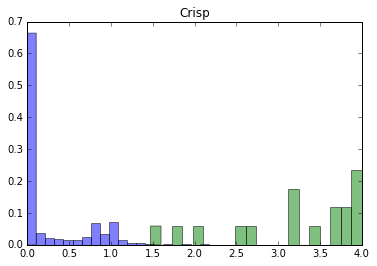

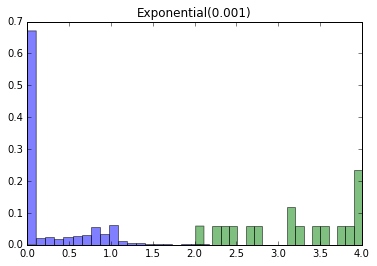

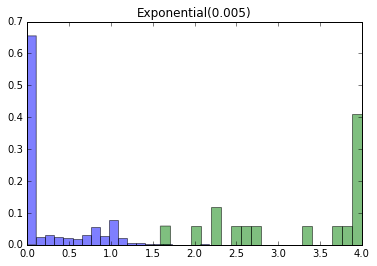

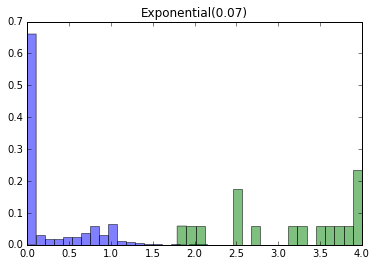

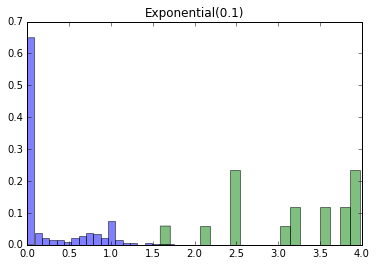

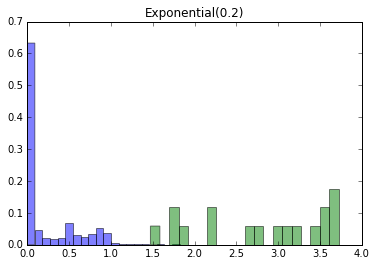

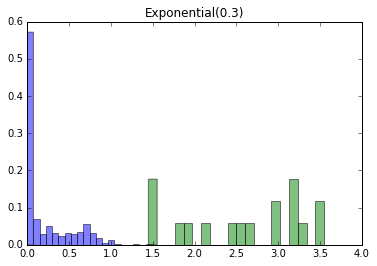

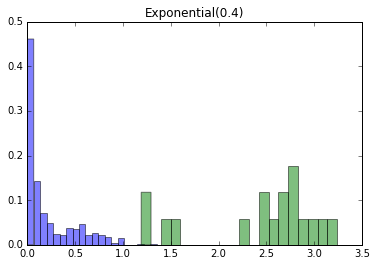

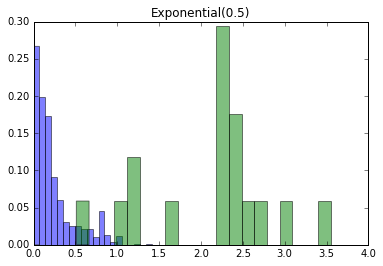

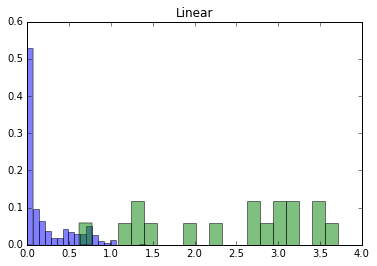

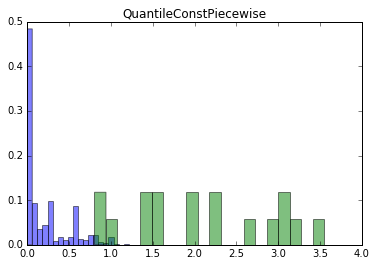

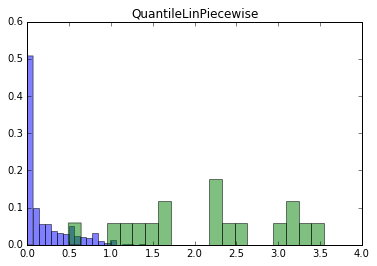

In [14]:
for fuzzifier in sorted(fuzzifiers):
    show_histograms(*get_cluster_errors(fuzzifier), title=fuzzifier)

All the pictures show indeed a quite good separation of the distributions for the average medians, especially if we consider the fuzzifiers exhibiting a higher nonlinearity (i.e., CrispFuzzifier one and fuzzifiers in the exponential family when their parameter is low enough to achieve a good difference from linear functions).

In [42]:
n = len(result_filled)*2
avg = np.array([0., 0.])
hardness = [None] * n

for p in result_filled.index:
    cluster_index = clusterization.predict(result_filled.loc[[p]])[0]
    avg[cluster_index] += result_filled.loc[[p]]['Crisp'][0]
    for i in map(int, p.split('-')):
        hardness[i] = cluster_index

n_cluster_1 = len([i for i in range(len(hardness)) if hardness[i]])
avg /= (float(n-n_cluster_1)/2, float(n_cluster_1)/2)

easy_index = avg.argmin()
hard_index = 1 - easy_index

easy_axioms = [i for i in range(len(hardness)) if hardness[i]==easy_index]
hard_axioms = [i for i in range(len(hardness)) if hardness[i]==hard_index]

print 'There are {} easy axioms and {} hard axioms.'.format(len(easy_axioms), len(hard_axioms))

There are 1410 easy axioms and 34 hard axioms.


In [50]:
import json

with open('hardness.json', 'w') as f:
    json.dump([1 if hardness[i]==hard_index else 0 for i in range(len(hardness))], f)